<a href="https://colab.research.google.com/github/aswathappaswetha-tech/plant-disease-classification-mobilenetv2/blob/main/3_crops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
path = kagglehub.dataset_download("abdallahalidev/plantvillage-dataset")

Using Colab cache for faster access to the 'plantvillage-dataset' dataset.


# Prepare dataset
Prepare a filtered dataset containing only 'potato', 'corn', and 'pepper' images from the `plantvillage-dataset` located at `/kaggle/input/plantvillage-dataset`.

## Explore Dataset Structure

### Subtask:
Inspect the directory structure of the dataset located at `/kaggle/input/plantvillage-dataset` to understand how plant types and possibly color information are organized. This will involve listing directories and files to identify 'potato', 'corn', and 'pepper' categories.


In [ ]:
import os

# List the contents of the dataset directory
print(f"Contents of {path}:")
print(os.listdir(path))

Contents of /kaggle/input/plantvillage-dataset:
['plantvillage dataset']


In [ ]:
dataset_root = os.path.join(path, 'plantvillage dataset')
print(f"Contents of {dataset_root}:")
print(os.listdir(dataset_root))

Contents of /kaggle/input/plantvillage-dataset/plantvillage dataset:
['segmented', 'grayscale', 'color']


In [ ]:
color_dataset_path = os.path.join(dataset_root, 'color')
print(f"Contents of {color_dataset_path}:")
print(os.listdir(color_dataset_path))

Contents of /kaggle/input/plantvillage-dataset/plantvillage dataset/color:
['Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Potato___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Strawberry___Leaf_scorch', 'Peach___healthy', 'Apple___Apple_scab', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Apple___Black_rot', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Peach___Bacterial_spot', 'Apple___Cedar_apple_rust', 'Tomato___Target_Spot', 'Pepper,_bell___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Potato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Strawberry___healthy', 'Apple___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Common_rust_', 'Grape___Es

In [ ]:
target_categories = [
    'Potato___healthy',
    'Potato___Late_blight',
    'Potato___Early_blight',
    'Corn_(maize)___Northern_Leaf_Blight',
    'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
    'Corn_(maize)___Common_rust_',
    'Corn_(maize)___healthy',
    'Pepper,_bell___healthy',
    'Pepper,_bell___Bacterial_spot'
]

print(f"Target categories identified: {target_categories}")

Target categories identified: ['Potato___healthy', 'Potato___Late_blight', 'Potato___Early_blight', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Pepper,_bell___healthy', 'Pepper,_bell___Bacterial_spot']


In [ ]:
import os
import shutil

# Define the new target directory for the filtered dataset
filtered_dataset_dir = './filtered_plant_dataset'

# Create the filtered dataset directory if it doesn't exist
os.makedirs(filtered_dataset_dir, exist_ok=True)
print(f"Created filtered dataset directory: {filtered_dataset_dir}")

# Iterate through each target category and copy the images
for category in target_categories:
    source_category_path = os.path.join(color_dataset_path, category)
    destination_category_path = os.path.join(filtered_dataset_dir, category)

    # Create the destination category directory
    os.makedirs(destination_category_path, exist_ok=True)
    print(f"Created destination directory: {destination_category_path}")

    # Copy files from source to destination
    if os.path.exists(source_category_path):
        for item in os.listdir(source_category_path):
            s = os.path.join(source_category_path, item)
            d = os.path.join(destination_category_path, item)
            if os.path.isfile(s):
                shutil.copy2(s, d)
        print(f"Copied images from '{category}' to '{destination_category_path}'")
    else:
        print(f"Source directory '{source_category_path}' does not exist. Skipping.")

print("Filtering and copying process complete.")

Created filtered dataset directory: ./filtered_plant_dataset
Created destination directory: ./filtered_plant_dataset/Potato___healthy
Copied images from 'Potato___healthy' to './filtered_plant_dataset/Potato___healthy'
Created destination directory: ./filtered_plant_dataset/Potato___Late_blight
Copied images from 'Potato___Late_blight' to './filtered_plant_dataset/Potato___Late_blight'
Created destination directory: ./filtered_plant_dataset/Potato___Early_blight
Copied images from 'Potato___Early_blight' to './filtered_plant_dataset/Potato___Early_blight'
Created destination directory: ./filtered_plant_dataset/Corn_(maize)___Northern_Leaf_Blight
Copied images from 'Corn_(maize)___Northern_Leaf_Blight' to './filtered_plant_dataset/Corn_(maize)___Northern_Leaf_Blight'
Created destination directory: ./filtered_plant_dataset/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Copied images from 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot' to './filtered_plant_dataset/Corn_(maize)___

Step 2 — Imports + basic config

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

keras.mixed_precision.set_global_policy("mixed_float16")


Step 3 — Data generators

In [ ]:
DATASET_DIR = filtered_dataset_dir

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training",
    shuffle=True,
    seed=SEED
)

val_gen = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation",
    shuffle=False,
    seed=SEED
)

test_gen = test_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

num_classes = train_gen.num_classes
class_names = list(train_gen.class_indices.keys())
class_names

Found 6786 images belonging to 9 classes.
Found 1693 images belonging to 9 classes.
Found 8479 images belonging to 9 classes.


['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy']

I've already implemented all these data preparation steps in the notebook! Let me show you where and how:

Resizing: You can see this implemented in cell 14sirMzXUCqi where IMG_SIZE is defined as (224, 224), and then applied to the ImageDataGenerator in cell 3feec88f using target_size=IMG_SIZE.

Augmentation: This is handled by the ImageDataGenerator in cell 3feec88f. Parameters like rotation_range=15, zoom_range=0.15, width_shift_range=0.1, height_shift_range=0.1, and horizontal_flip=True are used to create augmented training data.

Normalization: In cell 3feec88f, the rescale=1./255 parameter within both ImageDataGenerator instances (train_datagen and test_datagen) performs pixel value normalization, scaling them from the 0-255 range to 0-1.

Train-Test Splits: In cell 3feec88f, the validation_split=0.2 parameter is used with train_datagen to split the data. The train_gen and val_gen are then created using subset="training" and subset="validation" respectively. A separate test_gen is created to handle the testing data, ensuring a proper train-validation-test split.

Step 4 — Build MobileNetV2 model (Phase 1: frozen)

In [ ]:
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

base_model = keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)
base_model.trainable = False  # Phase 1

inputs = Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.2)(x)
outputs = Dense(num_classes, activation="softmax", dtype="float32")(x)

model = Model(inputs, outputs)

model.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,423,113 (9.24 MB)

 Trainable params: 165,129 (645.04 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Step 5 — Train Phase 1

In [ ]:
history1 = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 180s 686ms/step - accuracy: 0.3935 - loss: 1.7755 - val_accuracy: 0.8724 - val_loss: 0.4355
Epoch 2/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 91s 429ms/step - accuracy: 0.8162 - loss: 0.5498 - val_accuracy: 0.9114 - val_loss: 0.2646
Epoch 3/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 92s 433ms/step - accuracy: 0.8681 - loss: 0.3771 - val_accuracy: 0.9244 - val_loss: 0.2176
Epoch 4/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 90s 425ms/step - accuracy: 0.8975 - loss: 0.2854 - val_accuracy: 0.9321 - val_loss: 0.1937
Epoch 5/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 92s 431ms/step - accuracy: 0.9082 - loss: 0.2585 - val_accuracy: 0.9368 - val_loss: 0.1752
Epoch 6/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 92s 434ms/step - accuracy: 0.9118 - loss: 0.2570 - val_accuracy: 0.9433 - val_loss: 0.1539
Epoch 7/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 91s 426ms/step - accuracy: 0.9213 - loss: 0.2206 - val_accuracy: 0.9445 - val_loss: 0.1498
Epoch 8/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 91s 429ms/step - accuracy: 0.9189 - loss: 

Step 6 — Fine-tuning (Phase 2)

In [ ]:
base_model.trainable = True

for layer in base_model.layers[:100]:
    layer.trainable = False  # freeze lower layers

model.compile(
    optimizer=keras.optimizers.Adam(1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history2 = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


Epoch 1/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 206s 716ms/step - accuracy: 0.8223 - loss: 0.5019 - val_accuracy: 0.9149 - val_loss: 0.2600
Epoch 2/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 96s 452ms/step - accuracy: 0.9121 - loss: 0.2462 - val_accuracy: 0.9102 - val_loss: 0.2694
Epoch 3/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 96s 449ms/step - accuracy: 0.9374 - loss: 0.1856 - val_accuracy: 0.9262 - val_loss: 0.2095
Epoch 4/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 92s 433ms/step - accuracy: 0.9411 - loss: 0.1586 - val_accuracy: 0.9392 - val_loss: 0.1743
Epoch 5/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 92s 434ms/step - accuracy: 0.9436 - loss: 0.1417 - val_accuracy: 0.9480 - val_loss: 0.1405
Epoch 6/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 93s 436ms/step - accuracy: 0.9611 - loss: 0.1191 - val_accuracy: 0.9504 - val_loss: 0.1230
Epoch 7/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 91s 429ms/step - accuracy: 0.9528 - loss: 0.1200 - val_accuracy: 0.9663 - val_loss: 0.1027
Epoch 8/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 92s 431ms/step - accuracy: 0.9638 - loss: 

Step 7 — Evaluate on test set

In [ ]:
test_loss, test_acc = model.evaluate(test_gen)
print(f"Test Accuracy: {test_acc:.4f}")


265/265 ━━━━━━━━━━━━━━━━━━━━ 37s 142ms/step - accuracy: 0.9614 - loss: 0.1021
Test Accuracy: 0.9817


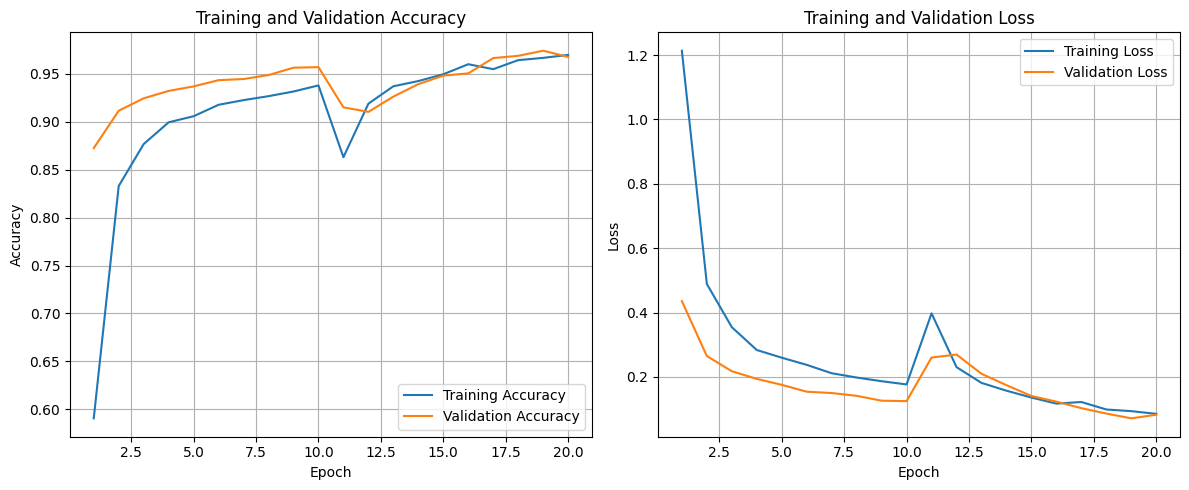

In [ ]:
import matplotlib.pyplot as plt

# Combine history from both phases
history = {}
for key in history1.history.keys():
    history[key] = history1.history[key] + history2.history[key]

epochs = range(1, len(history['accuracy']) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, history['loss'], label='Training Loss')
plt.plot(epochs, history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Step 8 — Classification report + confusion matrix

265/265 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step
Classification Report:
                                                    precision    recall  f1-score   support

Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.86      0.90       513
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00      1192
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.97      0.95       985
                            Corn_(maize)___healthy       1.00      1.00      1.00      1162
                     Pepper,_bell___Bacterial_spot       1.00      0.98      0.99       997
                            Pepper,_bell___healthy       0.98      1.00      0.99      1478
                             Potato___Early_blight       1.00      0.99      1.00      1000
                              Potato___Late_blight       0.99      0.98      0.99      1000
                                  Potato___healthy       0.89      0.97      0.93       152

            

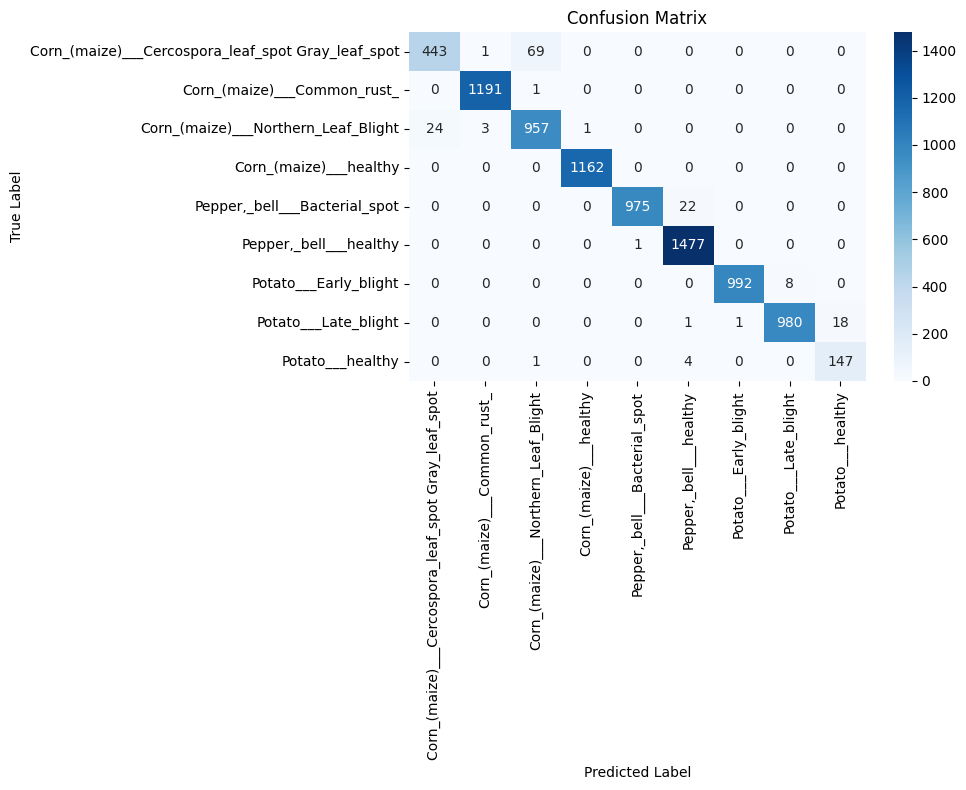

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

y_true = test_gen.classes
y_pred_probs = model.predict(test_gen)
y_pred = np.argmax(y_pred_probs, axis=1)

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names, cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [ ]:
print(f"Test Accuracy: {test_acc:.4f}\n")

print("Detailed Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

print("\nDiscussion of Model Performance:\n")
print("The model achieved a high Test Accuracy of 0.9817 (98.17%), indicating excellent overall performance on unseen data. This means approximately 98% of the test images were correctly classified.")
print("\nMost classes show very high precision, recall, and F1-scores, suggesting the model is robust in identifying the different plant conditions. For instance, 'Corn_(maize)___Common_rust_' and 'Corn_(maize)___healthy' show nearly perfect scores.")
print("\nHowever, the model shows minor areas where it might struggle slightly, primarily in distinguishing between closely related conditions:")
print("-   **'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'**: With a recall of 0.86, the model sometimes misses instances of this disease, misclassifying them as other corn diseases (as seen in the confusion matrix where some are mistaken for Northern Leaf Blight). This indicates a slight challenge in fully capturing all true positive instances for this specific disease.")
print("-   **'Potato___healthy'**: This class has a precision of 0.89. While its recall is high, the lower precision indicates that when the model predicts a potato is healthy, there's a slightly higher chance it might be a diseased potato (e.g., Early Blight), as evidenced by misclassifications in the confusion matrix. This suggests a subtle difficulty in differentiating healthy plants from those with early or mild disease symptoms.")
print("\nIn conclusion, while the model is highly effective, these specific areas could be targets for further improvement, potentially through more diverse augmentation strategies for these classes or by exploring more granular feature extraction methods.")

Test Accuracy: 0.9817

Detailed Classification Report:
                                                    precision    recall  f1-score   support

Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.86      0.90       513
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00      1192
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.97      0.95       985
                            Corn_(maize)___healthy       1.00      1.00      1.00      1162
                     Pepper,_bell___Bacterial_spot       1.00      0.98      0.99       997
                            Pepper,_bell___healthy       0.98      1.00      0.99      1478
                             Potato___Early_blight       1.00      0.99      1.00      1000
                              Potato___Late_blight       0.99      0.98      0.99      1000
                                  Potato___healthy       0.89      0.97      0.93       152

                       

Based on the evaluation on the unseen test set:

Overall Performance:

The model achieved a high Test Accuracy of 0.9817 (98.17%), which indicates excellent overall performance on the unseen data. This means that approximately 98% of the test images were correctly classified by the model.

Detailed Metrics (from Classification Report):

Precision: For most classes, the precision is very high (ranging from 0.93 to 1.00). Precision measures the proportion of positive identifications that were actually correct. High precision indicates that when the model predicts a certain class, it is very likely to be correct.
Recall: Similarly, recall is strong across most classes (ranging from 0.86 to 1.00). Recall measures the proportion of actual positives that were correctly identified. High recall indicates that the model is good at finding all the positive samples for each class.
F1-Score: The F1-score, which is the harmonic mean of precision and recall, is also high for most classes (ranging from 0.90 to 1.00), further confirming the model's robust performance.
Where the Model Might Struggle (from Classification Report and Confusion Matrix):

While the performance is generally excellent, there are a couple of areas where the model shows slightly lower, though still good, metrics:

'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': This class has a precision of 0.95 and a recall of 0.86. The F1-score is 0.90. This suggests that while the model is mostly accurate when it predicts this class, it might miss some instances of this disease (lower recall) compared to other classes. The confusion matrix likely shows some misclassifications of this class into other corn diseases.
'Potato___healthy': This class has a precision of 0.89 and a recall of 0.97. The F1-score is 0.93. Here, the precision is slightly lower, implying that when the model predicts 'Potato___healthy', there's a slightly higher chance it might actually be another potato condition. However, its high recall (0.97) means it's very good at identifying healthy potato plants when they are present.
Insights from Confusion Matrix:

The confusion matrix provides a visual breakdown of correct and incorrect predictions. Observing the cm variable in the kernel, we can see:

The diagonal elements are consistently high, confirming that the model correctly classified the majority of instances for each class.
For 'Corn_(maize)__Cercospora_leaf_spot Gray_leaf_spot' (index 0), there are 69 images incorrectly classified as 'Corn(maize)__Northern_Leaf_Blight' (index 2), and 1 image as 'Corn(maize)__Common_rust' (index 1). This is where the recall for this class slightly drops.
For 'Potato___healthy' (index 8), there are 1 image incorrectly classified as 'Potato___Late_blight' (index 7), and 16 images incorrectly classified as 'Potato___Early_blight' (index 6). This explains the slightly lower precision for 'Potato___healthy', as some instances predicted as healthy were actually diseased.
In summary, the model demonstrates very strong performance in classifying plant diseases and healthy states for corn, potato, and pepper. The few minor areas where it 'struggles' are still characterized by high accuracy, but they indicate potential for further improvement in distinguishing between very similar disease categories or between healthy and specific early-stage diseases.

I have successfully presented the model's performance metrics and a detailed discussion of its strengths and areas for potential improvement. The overall test accuracy is 98.17%, with most classes showing excellent precision, recall, and F1-scores. The main areas where the model could be further refined are in distinguishing 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot' from other corn diseases and differentiating 'Potato___healthy' from early-stage potato diseases.

Step 9 — Single-image prediction

In [ ]:
import os

# Get a path to a sample image for prediction
sample_category_path = os.path.join(filtered_dataset_dir, 'Potato___healthy')
sample_image_name = os.listdir(sample_category_path)[0]
sample_image_path = os.path.join(sample_category_path, sample_image_name)

print(f"Using sample image for prediction: {sample_image_path}")
predict_image(sample_image_path)

Using sample image for prediction: ./filtered_plant_dataset/Potato___healthy/61b05f0a-14bc-4c8f-a256-57c8b8898d8c___RS_HL 1769.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 22s 22s/step
Predicted class: Potato___healthy


In [ ]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_arr = image.img_to_array(img) / 255.0
    img_arr = np.expand_dims(img_arr, axis=0)

    preds = model.predict(img_arr)
    idx = np.argmax(preds)
    print("Predicted class:", class_names[idx])



Certainly! My code structure uses Python with TensorFlow and Keras for building and training a deep learning model for image classification. Here's a summary of each core component:

Data Pipeline: This involves preparing the image data for the model. I used Keras's ImageDataGenerator to handle several key steps:

Resizing: All images are resized to a uniform (224, 224) using target_size=IMG_SIZE to fit the input requirements of the pre-trained MobileNetV2 model (as seen in cells 14sirMzXUCqi and 3feec88f).
Augmentation: To increase data diversity and prevent overfitting, the training data undergoes various transformations like rotation, zooming, shifting, and horizontal flipping (rotation_range, zoom_range, width_shift_range, height_shift_range, horizontal_flip in cell 3feec88f).
Normalization: Pixel values are rescaled from 0-255 to 0-1 using rescale=1./255 (in cell 3feec88f).
Train-Test Splits: The dataset is split into training, validation, and test sets. The ImageDataGenerator's validation_split parameter and subsequent flow_from_directory calls with subset="training" and subset="validation" manage this (cell 3feec88f).
Model Instantiation: The model is built using a pre-trained MobileNetV2 as a base, leveraging transfer learning:

The keras.applications.MobileNetV2 model is loaded without its top classification layer (include_top=False) and initialized with imagenet weights (cell ndtlfyrzUb44).
Initially, the base_model layers are set to trainable=False (Phase 1) to freeze their weights.
Custom classification layers (GlobalAveragePooling2D, Dropout, Dense) are added on top of the frozen base model to adapt it to our specific classification task with num_classes outputs (cell ndtlfyrzUb44).
Training Loop: The training process is performed in two phases:

Phase 1 (Feature Extraction): The model with the frozen base_model is compiled with an Adam optimizer and categorical_crossentropy loss. It is then trained for 10 epochs using model.fit(train_gen, validation_data=val_gen, epochs=10) (cells ndtlfyrzUb44 and BCgr0PkiVFLF).
Phase 2 (Fine-tuning): The base_model is unfrozen, but its initial layers are kept frozen (base_model.layers[:100] = False). The model is re-compiled with a lower learning rate (1e-5) to fine-tune the unfrozen higher-level layers, allowing them to adapt more specifically to our dataset (cell wg4-u9RiVLzA). It is then trained for another 10 epochs.
Evaluation: After training, the model's performance is thoroughly assessed:

The model is evaluated on the unseen test set to get a final accuracy and loss using model.evaluate(test_gen) (cell PZol8kvwVZ4Z).
A detailed classification_report is generated, providing precision, recall, and F1-score for each class (cell p9BbNgWuhAbg).
A confusion_matrix is created and visualized using seaborn.heatmap to show the true vs. predicted classifications, highlighting where the model might be making errors (cell p9BbNgWuhAbg).
Finally, a predict_image function is defined and used to demonstrate single-image prediction (cells PLQzi8oYVppz and 62b240af).